## Demo analysis of MuSiC manual
MuSiC requires raw read counts for both bulk and single-cell expression. 

In [25]:
library(MuSiC)
library(Biobase)
library(survival)
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(reshape)
library(corrplot)

Loading required package: nnls

Loading required package: ggplot2

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object

In [20]:
df_Puram<-read.table("/home/cke/Puram/Puram_pseudobulk_scRNAref.tsv",sep='\t',header=TRUE,row.names = 1,check.names = FALSE)

In [21]:
df_Puram = t(df_Puram)
df_Puram

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
C9orf152     0.00000                0.00000              
RPS11        6.00370                7.30060              
ELMO2        0.00000                0.00000              
CREB3L1      0.00000                0.00000              
PNMA1        5.14740                5.33290              
MMP2         0.00000                0.00000              
TMEM216      0.00000                0.00000              
TRAF3IP2-AS1 0.29983                0.59072              
LRRC37A5P    0.00000                0.00000              
LOC653712    0.00000                0.00000              
C10orf90     0.00000                0.00000              
ZHX3         0.00000                0.00000              
ERCC5        0.00000                0.00000              
GPR98        0.00000                0.00000              
RXFP3        0.00000                0.00000              
CTAGE10P     0.00000                0.00000              
APBB2        1.84320                0.12829              
KLHL13       0.61259                0.00000              
PDCL3        0.00000                0.00000              
AEN          0.00000                0.00000              
FRG2         0.00000                0.00000              
DECR1        0.00000                0.00000              
SALL1        0.00000                0.00000              
GGT3P        0.00000                0.00000              
CADM4        0.00000                0.00000              
RPS18        5.95950                7.88360              
SLC10A7      0.00000                0.00000              
CFHR5        0.00000                0.00000              
OR2K2        0.00000                0.00000              
BRIX1        0.00000                0.00000              
⋮            ⋮                      ⋮                    
PHF21A       0.000000               0.12565              
FAM49B       0.000000               0.00000              
PNPLA2       0.000000               0.00000              
CNST         3.757300               0.32423              
ERCC2        0.000000               0.00000              
EAF2         0.000000               0.00000              
VPS13B       0.000000               0.00000              
TP53TG3B     0.000000               0.00000              
C14orf101    0.000000               0.00000              
ST18         0.000000               0.00000              
PSMB9        4.472300               0.00000              
ADRBK2       0.051024               0.16864              
HCLS1        4.655000               0.00000              
GPR15        0.000000               0.00000              
LOC100093631 0.000000               0.00000              
CSF2         0.000000               0.00000              
SLC2A11      0.166070               0.00000              
SELO         0.000000               0.00000              
GRIP2        0.000000               2.65420              
GOLGA8B      0.000000               0.00000              
MIR4691      0.000000               0.00000              
GPLD1        0.125650               0.00000              
RAB8A        0.173770               0.00000              
RXFP2        0.000000               0.00000              
PCIF1        4.055700               6.26410              
PIK3IP1      0.000000               0.00000              
SNRPD2       0.000000               5.08460              
SLC39A6      0.000000               0.00000              
CTSC         0.062122               0.28214              
AQP7         0.000000               0.00000              
             HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
C9orf152     0.42761                0.000000              
RPS11        7.28850                0.000000              
ELMO2        0.00000                5.246500              
CREB3L1      0.00000                0.000000              
PNMA1        2.83370                5.750700              
MMP2         0.00000                0.000000              
TMEM

In [22]:
df_pseudobulk_raw <- read.table("/home/cke/Puram/Puram_pseudobulk_fromraw.tsv",sep='\t',header=TRUE,row.names = 1,check.names = FALSE)

In [23]:
df_pseudobulk_raw <- t(df_pseudobulk_raw)
df_pseudobulk_raw

0            6           7         8          10        
C9orf152        0.1466600    1.383703  0.000000   0.296310   0.219090
RPS11         877.7204600 2037.326000 26.748200 513.901800 434.960100
ELMO2         202.3463000  146.851530  9.632000  35.811130   6.713079
CREB3L1         0.0000000   46.891560  0.000000   4.330050   0.887530
PNMA1         113.4092000  269.970700  0.000000  39.936310  14.146150
MMP2           45.4303550  495.995760  4.881300 109.194700 117.446030
TMEM216        57.6823000  161.015880  0.000000  14.057400  29.720000
TRAF3IP2-AS1  127.3127600  140.229080  0.685584  45.321750  19.042590
LRRC37A5P       0.0000000    1.082720  0.000000   0.000000   0.000000
LOC653712      12.7085500   19.482645  0.056584   3.503540   3.117744
C10orf90        0.0000000   68.052220  0.000000   0.000000   0.000000
ZHX3           32.5270230  112.204740  0.116294  11.816593  17.201626
ERCC5         165.8413700  121.425430  4.892000  51.611630  20.516770
GPR98           0.6183802   60.742817  1.288100   1.727154   2.572200
RXFP3           0.0000000    0.250960  0.000000   1.622500   0.000000
CTAGE10P        1.6652100    3.532090  0.000000   0.464105   0.060739
APBB2          22.1802560  204.513120  0.021480  51.383940  14.652127
KLHL13          0.5310700  117.993510  0.000000   6.007400   0.000000
PDCL3         527.9169000  347.862030 10.736200  51.152070  50.669758
AEN            56.4716000  238.691240  0.000000  46.601050  36.650810
FRG2            2.3523660    2.617353  0.000000   0.627896   0.410189
DECR1         194.0961300  521.757700  4.713800  63.845310 110.892650
SALL1           0.0000000    0.000000  0.000000   0.157040   0.000000
GGT3P           2.2702599    1.032800  0.000000   0.778210   1.545500
CADM4           0.0000000   18.292160  0.000000   0.000000   1.868300
RPS18        1504.2025000 2180.196300 23.513300 577.179570 425.958680
SLC10A7        73.0294900   80.765010  0.000000  14.423300  18.507800
CFHR5           0.0000000    0.000000  0.000000   0.000000   0.000000
OR2K2           0.0000000    6.367410  0.000000   0.000000   0.000000
BRIX1         150.3921700  565.811460 16.032100 155.094900  60.514920
⋮            ⋮            ⋮           ⋮         ⋮          ⋮         
PHF21A        95.28729      95.341110  0.000000  24.315334  31.65456 
FAM49B       311.88306     257.765200  4.131500  66.970160  20.73719 
PNPLA2       111.56991     231.311660  0.000000  17.229030  11.47189 
CNST         157.58620     242.270940  0.000000  63.081750  59.00891 
ERCC2         48.03250     113.558530  0.025738   4.706200  18.11290 
EAF2          62.39320      51.477670  0.000000  86.066630  46.30164 
VPS13B       151.50565     467.238000  0.010064  48.705242  23.10896 
TP53TG3B       1.67760       2.660400  0.000000   0.000000   0.00000 
C14orf101     16.60383      91.712620  0.000000  19.043304   7.95000 
ST18           0.19787       3.282770  0.000000   0.000000   0.00000 
PSMB9        901.72440     682.948500 11.871799 308.732420 310.02860 
ADRBK2        60.20749      83.017560  0.200388  43.260906  23.94167 
HCLS1        819.73206     118.936960  0.000000 140.224010  65.16455 
GPR15        213.87800       4.081500  0.000000  11.241400   5.71780 
LOC100093631   0.66993      19.722260  0.000000   1.229000   0.00000 
CSF2           0.00000       0.000000  0.000000   0.000000  13.78910 
SLC2A11       15.63193      21.023090  0.000000   2.482458   7.75940 
SELO          66.26783     107.068260  0.028569   5.008000   5.86304 
GRIP2          0.36910       8.944019  0.000000   1.070118   2.07960 
GOLGA8B      362.91525     205.416240  0.084064  97.989560  31.09269 
MIR4691        3.45880       0.000000  0.000000   0.000000   3.84490 
GPLD1         53.81430      80.127975  0.449178  33.055904  17.66165 
RAB8A        378.27750     622.333900 15.637600 110.175644 197.23979 
RXFP2          0.00000       0.000000  0.000000   0.000000   0.00000 
PCIF1        251.92575     354.291080  0.000000  68.483430  59.11239 
PIK3IP1      902.32196 

In [25]:
# read in marker genes
# marker_genes <- scan("/home/cke/Puram/top100DEGs.txt",character(),sep=',')
marker_genes <- scan("/home/cke/Puram/top100DEGs_pseudobulk.txt",character(),sep=',')

In [26]:
length(marker_genes)

[1] 880

In [27]:
df_Puram

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
C9orf152     0.00000                0.00000              
RPS11        6.00370                7.30060              
ELMO2        0.00000                0.00000              
CREB3L1      0.00000                0.00000              
PNMA1        5.14740                5.33290              
MMP2         0.00000                0.00000              
TMEM216      0.00000                0.00000              
TRAF3IP2-AS1 0.29983                0.59072              
LRRC37A5P    0.00000                0.00000              
LOC653712    0.00000                0.00000              
C10orf90     0.00000                0.00000              
ZHX3         0.00000                0.00000              
ERCC5        0.00000                0.00000              
GPR98        0.00000                0.00000              
RXFP3        0.00000                0.00000              
CTAGE10P     0.00000                0.00000              
APBB2        1.84320                0.12829              
KLHL13       0.61259                0.00000              
PDCL3        0.00000                0.00000              
AEN          0.00000                0.00000              
FRG2         0.00000                0.00000              
DECR1        0.00000                0.00000              
SALL1        0.00000                0.00000              
GGT3P        0.00000                0.00000              
CADM4        0.00000                0.00000              
RPS18        5.95950                7.88360              
SLC10A7      0.00000                0.00000              
CFHR5        0.00000                0.00000              
OR2K2        0.00000                0.00000              
BRIX1        0.00000                0.00000              
⋮            ⋮                      ⋮                    
PHF21A       0.000000               0.12565              
FAM49B       0.000000               0.00000              
PNPLA2       0.000000               0.00000              
CNST         3.757300               0.32423              
ERCC2        0.000000               0.00000              
EAF2         0.000000               0.00000              
VPS13B       0.000000               0.00000              
TP53TG3B     0.000000               0.00000              
C14orf101    0.000000               0.00000              
ST18         0.000000               0.00000              
PSMB9        4.472300               0.00000              
ADRBK2       0.051024               0.16864              
HCLS1        4.655000               0.00000              
GPR15        0.000000               0.00000              
LOC100093631 0.000000               0.00000              
CSF2         0.000000               0.00000              
SLC2A11      0.166070               0.00000              
SELO         0.000000               0.00000              
GRIP2        0.000000               2.65420              
GOLGA8B      0.000000               0.00000              
MIR4691      0.000000               0.00000              
GPLD1        0.125650               0.00000              
RAB8A        0.173770               0.00000              
RXFP2        0.000000               0.00000              
PCIF1        4.055700               6.26410              
PIK3IP1      0.000000               0.00000              
SNRPD2       0.000000               5.08460              
SLC39A6      0.000000               0.00000              
CTSC         0.062122               0.28214              
AQP7         0.000000               0.00000              
             HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
C9orf152     0.42761                0.000000              
RPS11        7.28850                0.000000              
ELMO2        0.00000                5.246500              
CREB3L1      0.00000                0.000000              
PNMA1        2.83370                5.750700              
MMP2         0.00000                0.000000              
TMEM

In [28]:
df_Puram_filtered <- subset(df_Puram, row.names(df_Puram) %in% marker_genes)
df_Puram_filtered

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb HN26_P14_D11_S239_comb
LMAN1     3.75390               0.00000               2.805500              
SERPINF1  5.59880               0.00000               0.000000              
TEK       0.00000               0.00000               0.000000              
CD38      0.00000               0.00000               0.000000              
TNNT3     0.00000               0.00000               0.000000              
CD82      0.42223               0.00000               2.964400              
CHST6     0.00000               0.55483               0.117700              
KRT15     0.00000               0.00000               1.957500              
FHL1      5.72260               5.95990               3.554700              
BTK       0.00000               0.00000               0.000000              
ARGFX     0.21537               0.40926               0.128290              
SERP1     0.89840               0.00000               4.482600              
DAND5     0.41251               0.88440               0.215370              
B2M      10.87600               9.18920               7.665000              
SQLE      0.00000               0.00000               0.490570              
GLIPR2    3.76770               0.00000               0.000000              
GPX4      0.00000               6.31740               3.991800              
DDIT4L    0.00000               0.00000               0.000000              
ARHGDIB   4.86380               5.50540               0.000000              
AK1       3.44070               0.00000               1.674500              
C4B       5.88920               0.00000               0.000000              
HNRNPH1   5.69790               6.50670               4.881900              
MFGE8     6.01170               7.45550               1.455800              
PDLIM1    4.35680               4.61290               3.380300              
ALOX5AP   0.00000               0.00000               0.000000              
SLC25A4   0.79161               3.28420               1.708400              
TESPA1    0.00000               0.00000               0.041243              
LAT       0.00000               0.00000               0.000000              
TACSTD2   0.00000               0.00000               5.214000              
ACSL1     0.00000               0.00000               0.000000              
⋮        ⋮                      ⋮                     ⋮                     
TPD52     0.000000              0.000000              2.726800              
TAGLN    10.588000              7.555400              0.000000              
TPSAB1    0.000000              0.000000              0.000000              
GPR82     0.403810              0.266640              0.358400              
COTL1     4.468600              0.000000              0.000000              
MARCKS    0.000000              0.000000              2.044700              
NFIB      2.272000              3.188700              1.075200              
MB        0.000000              0.000000              1.618200              
ANXA8L1   0.000000              0.000000              0.000000              
ZC3H12D   0.132250              0.000000              0.158340              
HSPA5     4.451500              3.642000              5.532100              
COL14A1   5.444100              0.000000              0.000000              
TRIM54    0.000000              0.000000              0.000000              
CELSR1    0.000000              0.000000              0.126970              
NEXN      4.355200              4.362000              0.000000              
RPL23     5.390800              7.503100              5.819200              
AKAP13    2.694200              3.673700              0.000000              
SLC45A3   0.000000              0.000000              0.000000              
PKM       5.424100              3.578200              5.640800              
LAPTM5    0.000000              0.000000              0.000000              
ADCK3

In [29]:
label <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",sep=',',header=TRUE,row.names = 1)
label_subtype <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes.csv",sep=',',header=TRUE,row.names = 1)

In [30]:
label$subtype <- label_subtype$cell_category

In [31]:
label$sampleID <- rownames(label)

In [32]:
label <- subset(label, row.names(label) %in% colnames(df_Puram))

In [33]:
label

cell_category subtype    sampleID                 
HN28_P15_D06_S330_comb    Fibroblast    Fibroblast HN28_P15_D06_S330_comb   
HN28_P6_G05_S173_comb     Fibroblast    Fibroblast HN28_P6_G05_S173_comb    
HN26_P14_D11_S239_comb    tumor         tumor 26   HN26_P14_D11_S239_comb   
HN26_P14_H05_S281_comb    Fibroblast    Fibroblast HN26_P14_H05_S281_comb   
HN26_P25_H09_S189_comb    tumor         tumor 26   HN26_P25_H09_S189_comb   
HN26_P14_H06_S282_comb    tumor         tumor 26   HN26_P14_H06_S282_comb   
HN25_P25_C04_S316_comb    tumor         tumor 25   HN25_P25_C04_S316_comb   
HN26_P25_A11_S107_comb    Fibroblast    Fibroblast HN26_P25_A11_S107_comb   
HN26_P25_C09_S129_comb    tumor         tumor 26   HN26_P25_C09_S129_comb   
HNSCC26_P24_H05_S377_comb tumor         tumor 26   HNSCC26_P24_H05_S377_comb
HN25_P5_E10_S58_comb      Fibroblast    Fibroblast HN25_P5_E10_S58_comb     
HN25_P24_B02_S110_comb    tumor         tumor 25   HN25_P24_B02_S110_comb   
HN25_P25_C01_S313_comb    B cell        B cell     HN25_P25_C01_S313_comb   
HN28_P15_G06_S366_comb    Fibroblast    Fibroblast HN28_P15_G06_S366_comb   
HN26_P6_B06_S18_comb      Fibroblast    Fibroblast HN26_P6_B06_S18_comb     
HN25_P5_C05_S29_comb      Fibroblast    Fibroblast HN25_P5_C05_S29_comb     
HN28_P6_D09_S141_comb     Fibroblast    Fibroblast HN28_P6_D09_S141_comb    
HN26_P5_H01_S85_comb      tumor         tumor 26   HN26_P5_H01_S85_comb     
HN26_P13_D07_S139_comb    Fibroblast    Fibroblast HN26_P13_D07_S139_comb   
HN26_P5_E06_S54_comb      tumor         tumor 26   HN26_P5_E06_S54_comb     
HN26_P26_H05_S377_comb    tumor         tumor 26   HN26_P26_H05_S377_comb   
HNSCC26_P24_F12_S360_comb tumor         tumor 26   HNSCC26_P24_F12_S360_comb
HNSCC26_P24_F03_S351_comb tumor         tumor 26   HNSCC26_P24_F03_S351_comb
HN26_P6_D08_S44_comb      tumor         tumor 26   HN26_P6_D08_S44_comb     
HN25_P5_E12_S60_comb      Fibroblast    Fibroblast HN25_P5_E12_S60_comb     
HNSCC26_P24_C01_S313_comb tumor         tumor 26   HNSCC26_P24_C01_S313_comb
HN25_P5_F01_S61_comb      Fibroblast    Fibroblast HN25_P5_F01_S61_comb     
HN26_P5_D12_S48_comb      Fibroblast    Fibroblast HN26_P5_D12_S48_comb     
HN25_P25_C11_S323_comb    Fibroblast    Fibroblast HN25_P25_C11_S323_comb   
HN25_P25_B12_S312_comb    tumor         tumor 25   HN25_P25_B12_S312_comb   
⋮                         ⋮             ⋮          ⋮                        
HNSCC20_P3_E11_S59_comb   tumor         tumor 20   HNSCC20_P3_E11_S59_comb  
HNSCC20_P3_F11_S71_comb   tumor         tumor 20   HNSCC20_P3_F11_S71_comb  
HNSCC20_P13_D05_S233_comb tumor         tumor 20   HNSCC20_P13_D05_S233_comb
HNSCC20_P3_C02_S26_comb   tumor         tumor 20   HNSCC20_P3_C02_S26_comb  
HNSCC17_P4_H09_S189_comb  tumor         tumor 17   HNSCC17_P4_H09_S189_comb 
HNSCC20_P13_C08_S224_comb tumor         tumor 20   HNSCC20_P13_C08_S224_comb
HNSCC17_P4_A08_S104_comb  tumor         tumor 17   HNSCC17_P4_A08_S104_comb 
HNSCC17_P4_E10_S154_comb  tumor         tumor 17   HNSCC17_P4_E10_S154_comb 
HNSCC17_P4_E02_S146_comb  tumor         tumor 17   HNSCC17_P4_E02_S146_comb 
HNSCC20_P13_F10_S262_comb tumor         tumor 20   HNSCC20_P13_F10_S262_comb
HNSCC17_P4_D04_S136_comb  tumor         tumor 17   HNSCC17_P4_D04_S136_comb 
HNSCC20_P13_C06_S222_comb tumor         tumor 20   HNSCC20_P13_C06_S222_comb
HNSCC20_P13_C12_S228_comb tumor         tumor 20   HNSCC20_P13_C12_S228_comb
HNSCC17_P4_H04_S184_comb  tumor         tumor 17   HNSCC17_P4_H04_S184_comb 
HNSCC17_P4_C06_S126_comb  tumor         tumor 17   HNSCC17_P4_C06_S126_comb 
HNSCC20_P3_D01_S37_comb   tumor         tumor 20   HNSCC20_P3_D01_S37_comb  
HNSCC20_P3_D09_S45_comb   tumor         tumor 20   HNSCC20_P3_D09_S45_comb  
HNSCC17_P4_E06_S150_comb  tumor         tumor 17   HNSCC17_P4_E06_S150_comb 
HNSCC17_P4_A02_S98_comb                            HNSCC17_P4_A02_S98_comb  
HNSCC20_P13_D01_S229_comb tumor         tumor 20   HNSCC20_P13_D01_S229_comb
HNSCC17_P4_B04_S112_co

In [34]:
# prepare scRNA-seq ref data, as expressionset object
metadata <- data.frame(labelDescription= c("sampleID","cell_category", "subtype"), row.names=c("sampleID","cell_category", "subtype"))
Puram.eset = ExpressionSet(assayData = data.matrix(df_Puram_filtered), phenoData =  new("AnnotatedDataFrame", data = label, varMetadata = metadata) )

In [35]:
Puram.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 880 features, 4956 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb ...
    HNSCC20_P3_G06_S78_comb (4956 total)
  varLabels: cell_category subtype sampleID
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [36]:
pseudobulk_raw.eset = ExpressionSet(assayData = data.matrix(df_pseudobulk_raw))
# pseudobulk_harmony.eset = ExpressionSet(assayData = data.matrix(df_pseudobulk_harmony))

In [37]:
pseudobulk_raw.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 21437 features, 17 samples 
  element names: exprs 
protocolData: none
phenoData: none
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [38]:
# Estimate cell type proportions
Est.prop.tcga_raw = music_prop(bulk.eset = pseudobulk_raw.eset, sc.eset = Puram.eset, clusters = 'cell_category',
                               samples = 'sampleID')

Creating Relative Abundance Matrix...

Creating Variance Matrix...

Creating Library Size Matrix...

Used 880 common genes...

Used 10 cell types in deconvolution...

0 has common genes 842 ...

6 has common genes 873 ...

7 has common genes 558 ...

8 has common genes 847 ...

10 has common genes 811 ...

12 has common genes 812 ...

13 has common genes 847 ...

16 has common genes 876 ...

17 has common genes 861 ...

18 has common genes 880 ...

20 has common genes 846 ...

22 has common genes 845 ...

23 has common genes 616 ...

24 has common genes 856 ...

25 has common genes 880 ...

26 has common genes 871 ...

28 has common genes 878 ...



In [39]:
names(Est.prop.tcga_raw)

[1] "Est.prop.weighted" "Est.prop.allgene"  "Weight.gene"      
[4] "r.squared.full"    "Var.prop"

In [40]:
# MuSiC estimated proportions, subjects by cell types;
Est.prop.tcga_raw$Est.prop.weighted

Fibroblast  tumor       B cell      myocyte                  Macrophage  
0  0.056412334 0.051976472 0.046860279 0.0000000000 0.003392371 0.0096531387
6  0.255503728 0.343019953 0.008960878 0.0022345413 0.147736389 0.0166731506
7  0.136455887 0.652254014 0.000000000 0.0000000000 0.162602319 0.0005053070
8  0.109354715 0.000000000 0.058164509 0.0000000000 0.050989281 0.0095553661
10 0.132978230 0.000000000 0.618607666 0.0000000000 0.054186234 0.0133620135
12 0.007653159 0.042008253 0.000000000 0.0011950435 0.034461650 0.0000000000
13 0.061160545 0.089718186 0.112740239 0.0000000000 0.000000000 0.0553885220
16 0.199250573 0.125926810 0.004465496 0.0004934037 0.002726426 0.0130169068
17 0.024134119 0.827693252 0.008258569 0.0000000000 0.000000000 0.0006382955
18 0.063380621 0.177730658 0.028930092 0.0003982521 0.323190552 0.0142063403
20 0.015577740 0.954609619 0.000000000 0.0006107408 0.027888517 0.0000000000
22 0.230628705 0.662558814 0.000000000 0.0000000000 0.000000000 0.0000000000
23 0.000000000 0.006882143 0.002032509 0.0028073520 0.000000000 0.0294072026
24 0.693867819 0.102909984 0.009317322 0.0000000000 0.000000000 0.0355036786
25 0.404752496 0.314403122 0.032740838 0.0130860791 0.000000000 0.0059817202
26 0.356601334 0.471761865 0.003520356 0.0005096553 0.121364374 0.0060007351
28 0.662394539 0.257040067 0.032232890 0.0169333233 0.000000000 0.0043931707
   Endothelial  T cell      Dendritic    Mast       
0  0.0008658051 0.808154688 0.0021401845 0.020544727
6  0.2226440173 0.000000000 0.0009941053 0.002233238
7  0.0199392906 0.001479181 0.0267640018 0.000000000
8  0.3196734742 0.393375016 0.0457359697 0.013151668
10 0.0827732921 0.082948329 0.0007445118 0.014399724
12 0.0000000000 0.914681894 0.0000000000 0.000000000
13 0.0343345876 0.177588778 0.4163896546 0.052679487
16 0.0800069384 0.538042635 0.0039451418 0.032125670
17 0.0201368368 0.105659780 0.0000000000 0.013479148
18 0.0340245707 0.336654382 0.0000000000 0.021484532
20 0.0013133833 0.000000000 0.0000000000 0.000000000
22 0.0024359272 0.000000000 0.0000000000 0.104376553
23 0.0000000000 0.958870793 0.0000000000 0.000000000
24 0.0048130381 0.000000000 0.0000000000 0.153588158
25 0.0000000000 0.197799195 0.0128080677 0.018428483
26 0.0000000000 0.014567839 0.0239269056 0.001746936
28 0.0263422699 0.000000000 0.0000000000 0.000663740

In [43]:
#MuSiC estimated weight for each gene, genes by subjects;
Est.prop.tcga['Weight.gene']

$Weight.gene
                TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A
ENSG00000002549        4.9429750       61.9193373       43.3379445
ENSG00000002586        4.7500354        9.7120805       14.2442778
ENSG00000003436       37.3379740       77.5545811       24.2384775
ENSG00000004059       15.0032309       10.2830912        7.1767367
ENSG00000004779        2.9994714        6.7298645        5.1914493
ENSG00000005102      184.5360146      228.6319060     1731.4973417
ENSG00000005893       17.0286176       27.0892217       84.2489567
ENSG00000008282       11.6708653       25.6018991       10.0269063
ENSG00000008517        9.5768635       22.2326525       53.2219090
ENSG00000008952       45.5249432       16.3452917       31.3330806
ENSG00000010256        4.1877749        7.9393423        6.3046167
ENSG00000010278        0.5115402        9.6321182        9.1177602
ENSG00000010282      490.4213779               NA     9724.5409038
ENSG00000011052        2.3031708        5.6119050        4.0946309
ENSG00000011600        4.9791886      406.8351381       61.9988615
ENSG00000014216       69.9227210        1.9553781        4.5173696
ENSG00000018189       12.6222897       15.9984153       10.3170124
ENSG00000018280      305.1900401      147.9071412       17.9691822
ENSG00000018408       14.9667022       21.0815199       20.4535277
ENSG00000019582        5.9877608        1.0460633        0.8886569
ENSG00000023445       18.4883327      616.9009638      153.9428554
ENSG00000023697       37.7684795       11.2553040        8.6901534
ENSG00000024422       35.0215817       69.0396010        3.0294650
ENSG00000026025        6.9877043       54.9786645        1.5534415
ENSG00000026297        8.6352551       16.2099039       15.8511921
ENSG00000026508        0.6889504        2.4076701        0.4789498
ENSG00000026751      435.6617150      341.7640857        9.3885291
ENSG00000027075       20.6904138      106.2530128      121.1445037
ENSG00000027697       30.4238512       10.4143639       10.4487386
ENSG00000033178        6.7780028       14.5527740       33.0295014
ENSG00000033800       10.3478243       22.0352784       14.9382194
ENSG00000034510        0.6070045       61.6786147        1.9158428
ENSG00000039068        6.2145529        4.9494949        1.7867351
ENSG00000039560       44.5547553      222.5927533       28.8441784
ENSG00000041982        6.9470445       39.9893096        0.7514301
ENSG00000042493       49.9195861        9.5900166       35.6729947
ENSG00000043462       52.4585299       28.7958660        3.0160590
ENSG00000044574        8.5847315       77.5552122       13.7951915
ENSG00000047849        4.2652255        3.3283221        0.8751052
ENSG00000048740      185.9906021      211.3790813       25.0237221
ENSG00000049249       23.5110273       62.3247445       55.8545702
ENSG00000050438       45.0735079       52.7763938       42.0104152
ENSG00000053747        2.7098099       27.0045840        9.9556106
ENSG00000054219       18.9667431       59.5869244       89.4639459
ENSG00000054654        3.4577024      160.7469019       13.8328296
ENSG00000055044        4.7956781        7.4050744        5.8491497
ENSG00000056558      904.8781066      570.5626277       61.6917451
ENSG00000057657       34.1275670       17.3015391       78.4482421
ENSG00000059728       17.6091311       54.7011415      248.4750973
ENSG00000060237        0.9750224        0.9139091        0.9620525
ENSG00000062038       14.0846885       24.6820427        0.6009517
ENSG00000064666        5.1133021      149.9425253       72.0532193
ENSG00000065413      134.1405317      205.2186412      210.6827551
ENSG00000065911       43.8841394       17.2908631       12.1946095
ENSG00000066056       15.1292443       70.1506424        3.0323338
ENSG00000066294       11.4288331       51.9909366      478.3461428
ENSG00000066336        5.0611908       14.8132978        2.4601033
ENSG00000067167       11.6379974       14.2695876       64.5766421
ENSG00000067182       39.3995544  

In [44]:
# R squared from MuSiC estimated proportions for each subject;
Est.prop.tcga['r.squared.full']

$r.squared.full
TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A TCGA.CN.5374.01A 
      0.19128343       0.03134942       0.06599210       0.24164026 
TCGA.CQ.6227.01A TCGA.CV.6959.01A TCGA.F7.A61V.01A TCGA.CV.7413.01A 
      0.11006912       0.10345327       0.11919025       0.06619808 
TCGA.CV.7247.01A TCGA.CR.5249.01A TCGA.CQ.5331.01A TCGA.BB.8601.01A 
      0.11627326       0.15688368       0.05485907       0.12084388 
TCGA.CV.A45W.01A TCGA.CQ.7063.01A TCGA.CN.5373.01A TCGA.CV.A45T.01A 
      0.29463406       0.06857232       0.03004428       0.05353543 
TCGA.HD.A4C1.01A TCGA.CV.7438.11A TCGA.CV.5444.01A TCGA.BA.5556.01A 
      0.08716299       0.06161436       0.10813299       0.08500476 
TCGA.P3.A6SX.01A TCGA.CV.7242.11A TCGA.DQ.7592.01A TCGA.CV.6937.01A 
      0.11953352       0.13434684       0.11197578       0.14542769 
TCGA.QK.A8ZB.01A TCGA.CV.7432.01A TCGA.CV.7089.01A TCGA.CV.6939.11A 
      0.09623568       0.08295620       0.08787950       0.08403916 
TCGA.BA.4075.01A TCGA.T3.A92M.01A TCGA.BA.4078.01A TCGA.CV.7100.01A 
      0.18629940       0.18641490       0.25081663       0.25424521 
TCGA.MZ.A7D7.01A TCGA.QK.A652.01A TCGA.CV.6433.01A TCGA.CV.7416.01A 
      0.19007185       0.10037879       0.17594932       0.15773300 
TCGA.CV.A6JY.01A TCGA.CR.7399.01A TCGA.CV.7568.01A TCGA.KU.A66S.01A 
      0.05142502       0.23791700       0.07825756       0.28996025 
TCGA.QK.A6VC.01A TCGA.CN.6998.01A TCGA.CV.6941.01A TCGA.CN.4727.01A 
      0.20260969       0.09077407       0.13369329       0.21438942 
TCGA.BB.A5HY.01A TCGA.CV.7263.01A TCGA.H7.A76A.01A TCGA.CN.4723.01A 
      0.20691236       0.20627884       0.17545906       0.20748590 
TCGA.CN.6997.01A TCGA.CN.5364.01A TCGA.CN.A63V.01A TCGA.CQ.5325.01A 
      0.24093468       0.24353618       0.09234682       0.07334049 
TCGA.CR.7386.01A TCGA.CX.A4AQ.01A TCGA.QK.A64Z.01A TCGA.BB.4225.01A 
      0.04706299       0.22850294       0.10744009       0.25089096 
TCGA.CV.7183.11A TCGA.T2.A6WZ.01A TCGA.HD.8314.01A TCGA.CR.6473.01A 
      0.07518186       0.04641902       0.17622978       0.24121560 
TCGA.CN.A642.01A TCGA.BB.A6UO.01A TCGA.DQ.7591.01A TCGA.CR.7398.01A 
      0.16547221       0.06149429       0.19496268       0.17446007 
TCGA.HD.8634.01A TCGA.CR.7372.01A TCGA.HD.8224.01A TCGA.BA.4074.01A 
      0.07186862       0.04888925       0.16841832       0.21901217 
TCGA.CV.6961.11A TCGA.BB.A5HZ.01A TCGA.CQ.5332.01A TCGA.CR.7380.01A 
      0.03411762       0.09667960       0.10760858       0.07279290 
TCGA.CV.6936.01A TCGA.MZ.A6I9.01A TCGA.QK.AA3J.01A TCGA.BA.4077.01B 
      0.15488257       0.30383255       0.31380752       0.18265444 
TCGA.CQ.A4C7.01A TCGA.CV.7422.01A TCGA.CQ.A4CB.01A TCGA.F7.7848.01A 
      0.12002476       0.19950723       0.14968762       0.20091810 
TCGA.CR.7392.01A TCGA.CV.7178.11A TCGA.QK.A6VB.01A TCGA.CX.7082.01A 
      0.09726435       0.14821514       0.20333702       0.18350093 
TCGA.CV.7414.01A TCGA.CN.A63W.01A TCGA.BA.5557.01A TCGA.CV.7435.01A 
      0.19058744       0.12309464       0.06460413       0.16741517 
TCGA.UF.A7JT.01A TCGA.QK.A6IF.01A TCGA.QK.A6IJ.01A TCGA.CV.7248.01A 
      0.16158458       0.20683299       0.07168273       0.19842023 
TCGA.CV.7101.11A TCGA.H7.A6C4.11A TCGA.CV.6942.01A TCGA.RS.A6TP.01A 
      0.05185668       0.09149640       0.06236545       0.13306890 
TCGA.CV.7091.11A TCGA.D6.A6EM.01A TCGA.CV.7101.01A TCGA.CR.7371.01A 
      0.08778080       0.12834505       0.14775014       0.16721073 
TCGA.CQ.5329.01A TCGA.H7.8502.01A TCGA.CN.6989.01A TCGA.CN.5360.01A 
      0.11479141       0.10968364       0.14753180       0.10732251 
TCGA.CV.7097.11A TCGA.CV.7429.01A TCGA.H7.A6C4.01A TCGA.BA.5153.01A 
      0.23721894       0.26896763       0.06832750       0.18853369 
TCGA.BB.8596.01A TCGA.CR.7369.01A TCGA.CQ.7071.01A TCGA.BA.A6DB.01A 
      0.16312935       0.12388514       0.04959837       0.06730875 
TCGA.CV.A6K1.01A TCGA.MT.A51X.01A TCGA.4P.AA8J.01A TCGA.CV.5439.01A 
      0.08230573       0.07902141       0.14072521 

In [45]:
#variance of MuSiC estimates.
Est.prop.tcga['Var.prop']

$Var.prop
                   Fibroblast        tumor       B cell      myocyte
TCGA.BB.4224.01A 0.0011494415 0.0056012625 0.0003704218 1.188828e-04
TCGA.H7.7774.01A 0.0107211150 0.0457921166 0.0083266532 1.123522e-03
TCGA.CV.6943.01A 0.0068845999 0.0141688980 0.0031657844 2.911132e-04
TCGA.CN.5374.01A 0.0007812441 0.0027347007 0.0010089547 7.787824e-05
TCGA.CQ.6227.01A 0.0021805193 0.0031799328 0.0005248218 4.726909e-04
TCGA.CV.6959.01A 0.0025318236 0.0090369812 0.0015339609 6.037496e-04
TCGA.F7.A61V.01A 0.0009605173 0.0036862811 0.0005400591 1.514452e-04
TCGA.CV.7413.01A 0.0037412063 0.0111271609 0.0016423060 3.078464e-04
TCGA.CV.7247.01A 0.0027633155 0.0082717573 0.0006460157 1.015556e-03
TCGA.CR.5249.01A 0.0010456384 0.0029723475 0.0009974271 5.676321e-05
TCGA.CQ.5331.01A 0.0029198738 0.0225187332 0.0080968901 4.579614e-04
TCGA.BB.8601.01A 0.0005426058 0.0028459878 0.0002909059 7.561490e-05
TCGA.CV.A45W.01A 0.0009150807 0.0015043206 0.0007160651 2.786107e-05
TCGA.CQ.7063.01A 0.0019969445 0.0131757198 0.0025978464 2.303464e-04
TCGA.CN.5373.01A 0.0102433214 0.0288173563 0.0082507823 9.446434e-04
TCGA.CV.A45T.01A 0.0045139963 0.0149423914 0.0059180479 9.356618e-04
TCGA.HD.A4C1.01A 0.0007807982 0.0037724492 0.0007257316 1.044775e-04
TCGA.CV.7438.11A 0.0010434683 0.0035377933 0.0010240594 1.659872e-04
TCGA.CV.5444.01A 0.0026663403 0.0040017683 0.0010679170 3.029041e-04
TCGA.BA.5556.01A 0.0030118214 0.0097437526 0.0025135339 2.247984e-04
TCGA.P3.A6SX.01A 0.0018542085 0.0090490477 0.0009260873 6.838944e-04
TCGA.CV.7242.11A 0.0009823253 0.0034932219 0.0005187238 1.010978e-04
TCGA.DQ.7592.01A 0.0022789737 0.0099899496 0.0010386429 4.738958e-04
TCGA.CV.6937.01A 0.0026173068 0.0047726380 0.0007526720 8.135797e-05
TCGA.QK.A8ZB.01A 0.0028659919 0.0089432788 0.0019086113 1.294065e-04
TCGA.CV.7432.01A 0.0006437552 0.0032122562 0.0003272374 7.081230e-05
TCGA.CV.7089.01A 0.0021357614 0.0159756007 0.0015552339 2.238100e-04
TCGA.CV.6939.11A 0.0013266069 0.0003561320 0.0002584533 1.554425e-03
TCGA.BA.4075.01A 0.0018263866 0.0031887255 0.0006056675 2.225257e-04
TCGA.T3.A92M.01A 0.0017027275 0.0029629898 0.0016604942 7.918251e-05
TCGA.BA.4078.01A 0.0016372663 0.0022579248 0.0006282011 1.049365e-04
TCGA.CV.7100.01A 0.0011611328 0.0021068580 0.0003025393 4.391140e-05
TCGA.MZ.A7D7.01A 0.0008788926 0.0066711331 0.0006567285 7.935187e-05
TCGA.QK.A652.01A 0.0028892007 0.0086700522 0.0012661721 7.280959e-04
TCGA.CV.6433.01A 0.0011746526 0.0026110075 0.0014003800 6.481640e-05
TCGA.CV.7416.01A 0.0020084236 0.0047905344 0.0006076680 8.348462e-05
TCGA.CV.A6JY.01A 0.0007575719 0.0036336380 0.0004024286 6.947870e-05
TCGA.CR.7399.01A 0.0008215741 0.0020037824 0.0005220636 5.042519e-05
TCGA.CV.7568.01A 0.0028810111 0.0076186966 0.0010703705 2.520122e-04
TCGA.KU.A66S.01A 0.0014707594 0.0021090471 0.0005236122 3.701445e-04
TCGA.QK.A6VC.01A 0.0010027458 0.0024125142 0.0006454101 4.738578e-05
TCGA.CN.6998.01A 0.0007057099 0.0034920276 0.0003483706 1.162774e-04
TCGA.CV.6941.01A 0.0021937737 0.0059244165 0.0011628644 8.217557e-05
TCGA.CN.4727.01A 0.0014183194 0.0043767456 0.0002831596 8.268778e-05
TCGA.BB.A5HY.01A 0.0013702044 0.0030894786 0.0005069855 6.630009e-05
TCGA.CV.7263.01A 0.0014672589 0.0031408915 0.0007822952 2.705289e-04
TCGA.H7.A76A.01A 0.0020309000 0.0026991914 0.0009519206 7.457061e-05
TCGA.CN.4723.01A 0.0017797652 0.0039233515 0.0011136999 5.608675e-05
TCGA.CN.6997.01A 0.0009235924 0.0025387501 0.0003762578 4.731738e-05
TCGA.CN.5364.01A 0.0005931402 0.0032871299 0.0004355646 1.631600e-04
TCGA.CN.A63V.01A 0.0041697929 0.0088460038 0.0008359292 3.092804e-04
TCGA.CQ.5325.01A 0.0038177683 0.0096802442 0.0018997240 1.540314e-03
TCGA.CR.7386.01A 0.0094540198 0.0192138289 0.0028574250 5.602715e-04
TCGA.CX.A4AQ.01A 0.0016352534 0.0015840642 0.0008049673 6.032634e-05
TCGA.QK.A64Z.01A 0.0006404166 0.0026949983 0.0003229084 6.947801e-05
TCGA.BB.4225.01A 0.0009501357 0.0017338916 0.0006910966 5.491318e-05
TCGA.CV.7183.11A 0.0008084334 0.0029050396 0.0004694263 1

In [56]:
saveRDS(Est.prop.tcga_raw,"/home/cke/MuSic/MuSiC_Puramfiltered_DEGs_pseudobulk_res.rds")

### Comparing results from multiple methods

In [1]:
real_prop_raw <- read.csv("/home/cke/Puram/Puram_pseudobulk_prop_fromraw.tsv",sep='\t',row.names = 1)

In [2]:
real_prop_raw <- real_prop_raw[, order(names(real_prop_raw))]
# real_prop_raw

In [3]:
real_res <- real_prop_raw
real_res <- real_res[, order(colnames(real_res))]
colnames(real_res)[9] <- 'T-cell'
colnames(real_res)[1] <- 'B-cell'

In [42]:
real_res

B-cell      Dendritic   Endothelial Fibroblast  Macrophage  Mast       
0  0.039682540 0.003968254 0.000000000 0.047619048 0.007936508 0.019841270
6  0.014234875 0.000000000 0.185053381 0.281138790 0.021352313 0.003558719
7  0.000000000 0.000000000 0.000000000 0.250000000 0.000000000 0.000000000
8  0.022988506 0.000000000 0.287356322 0.137931034 0.000000000 0.022988506
10 0.537500000 0.000000000 0.100000000 0.225000000 0.000000000 0.012500000
12 0.000000000 0.000000000 0.000000000 0.007246377 0.000000000 0.000000000
13 0.080000000 0.386666667 0.026666667 0.066666667 0.026666667 0.053333333
16 0.000000000 0.010121457 0.072874494 0.200404858 0.012145749 0.030364372
17 0.014861996 0.000000000 0.031847134 0.072186837 0.004246285 0.014861996
18 0.018218623 0.000000000 0.030364372 0.080971660 0.006072874 0.022267206
20 0.000000000 0.000000000 0.001996008 0.021956088 0.000000000 0.000000000
22 0.000000000 0.005714286 0.005714286 0.274285714 0.000000000 0.108571429
23 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
24 0.000000000 0.000000000 0.008000000 0.712000000 0.016000000 0.152000000
25 0.037356322 0.012931034 0.001436782 0.349137931 0.002873563 0.018678161
26 0.002380952 0.007142857 0.000000000 0.307142857 0.007142857 0.002380952
28 0.042483660 0.000000000 0.034313725 0.658496732 0.003267974 0.001633987
   myocyte     other      T-cell      tumor     
0  0.000000000 0.05952381 0.789682540 0.03174603
6  0.000000000 0.08896797 0.000000000 0.40569395
7  0.000000000 0.00000000 0.000000000 0.75000000
8  0.000000000 0.10344828 0.425287356 0.00000000
10 0.000000000 0.02500000 0.087500000 0.01250000
12 0.000000000 0.06521739 0.898550725 0.02898551
13 0.000000000 0.12000000 0.186666667 0.05333333
16 0.002024291 0.04858300 0.530364372 0.09311741
17 0.000000000 0.04883227 0.123142251 0.69002123
18 0.002024291 0.22672065 0.388663968 0.22469636
20 0.000000000 0.02794411 0.000000000 0.94810379
22 0.000000000 0.02285714 0.000000000 0.58285714
23 0.000000000 0.00000000 1.000000000 0.00000000
24 0.000000000 0.05600000 0.008000000 0.04800000
25 0.011494253 0.03879310 0.242816092 0.28448276
26 0.000000000 0.04047619 0.011904762 0.62142857
28 0.014705882 0.01470588 0.004901961 0.22549020

In [41]:
MuSiC_res <- data.matrix(Est.prop.tcga_raw$Est.prop.weighted)

In [39]:
MuSiC_res <- read.csv("/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_pseudobulk.csv",row.names = 1)

In [40]:
# colnames(MuSiC_res)[5] <- 'other'
MuSiC_res <- MuSiC_res[, order(colnames(MuSiC_res))]
colnames(MuSiC_res)[9] <- 'T-cell'
colnames(MuSiC_res)[1] <- 'B-cell'

In [41]:
MuSiC_res

B-cell      Dendritic    Endothelial  Fibroblast  Macrophage   Mast       
0  0.046860279 0.0021401845 0.0008658051 0.056412334 0.0096531387 0.020544727
6  0.008960878 0.0009941053 0.2226440173 0.255503728 0.0166731506 0.002233238
7  0.000000000 0.0267640018 0.0199392906 0.136455887 0.0005053070 0.000000000
8  0.058164509 0.0457359697 0.3196734742 0.109354715 0.0095553661 0.013151668
10 0.618607666 0.0007445118 0.0827732921 0.132978230 0.0133620135 0.014399724
12 0.000000000 0.0000000000 0.0000000000 0.007653159 0.0000000000 0.000000000
13 0.112740239 0.4163896546 0.0343345876 0.061160545 0.0553885220 0.052679487
16 0.004465496 0.0039451418 0.0800069384 0.199250573 0.0130169068 0.032125670
17 0.008258569 0.0000000000 0.0201368368 0.024134119 0.0006382955 0.013479148
18 0.028930092 0.0000000000 0.0340245707 0.063380621 0.0142063403 0.021484532
20 0.000000000 0.0000000000 0.0013133833 0.015577740 0.0000000000 0.000000000
22 0.000000000 0.0000000000 0.0024359272 0.230628705 0.0000000000 0.104376553
23 0.002032509 0.0000000000 0.0000000000 0.000000000 0.0294072026 0.000000000
24 0.009317322 0.0000000000 0.0048130381 0.693867819 0.0355036786 0.153588158
25 0.032740838 0.0128080677 0.0000000000 0.404752496 0.0059817202 0.018428483
26 0.003520356 0.0239269056 0.0000000000 0.356601334 0.0060007351 0.001746936
28 0.032232890 0.0000000000 0.0263422699 0.662394539 0.0043931707 0.000663740
   myocyte      other       T-cell      tumor      
0  0.0000000000 0.003392371 0.808154688 0.051976472
6  0.0022345413 0.147736389 0.000000000 0.343019953
7  0.0000000000 0.162602319 0.001479181 0.652254014
8  0.0000000000 0.050989281 0.393375016 0.000000000
10 0.0000000000 0.054186234 0.082948329 0.000000000
12 0.0011950435 0.034461650 0.914681894 0.042008253
13 0.0000000000 0.000000000 0.177588778 0.089718186
16 0.0004934037 0.002726426 0.538042635 0.125926810
17 0.0000000000 0.000000000 0.105659780 0.827693252
18 0.0003982521 0.323190552 0.336654382 0.177730658
20 0.0006107408 0.027888517 0.000000000 0.954609619
22 0.0000000000 0.000000000 0.000000000 0.662558814
23 0.0028073520 0.000000000 0.958870793 0.006882143
24 0.0000000000 0.000000000 0.000000000 0.102909984
25 0.0130860791 0.000000000 0.197799195 0.314403122
26 0.0005096553 0.121364374 0.014567839 0.471761865
28 0.0169333233 0.000000000 0.000000000 0.257040067

In [34]:
NNLS_res <- read.csv("/home/cke/MuSic/celltypefrac_NNLS_Puramfiltered_pseudobulk.csv",row.names = 1)

In [35]:
# NNLS_res <- data.frame(Est.prop.tcga_raw$Est.prop.allgene)
NNLS_res <- NNLS_res[, order(colnames(NNLS_res))]
# colnames(NNLS_res)[5] <- 'other'

colnames(NNLS_res)[9] <- 'T-cell'
colnames(NNLS_res)[1] <- 'B-cell'

In [36]:
NNLS_res

B-cell     Dendritic   Endothelial Fibroblast   Macrophage  Mast        
0  0.04416345 0.008977645 0.000000000 0.0491973410 0.022875621 0.0202085209
6  0.00000000 0.011909192 0.221736527 0.2604452163 0.003578991 0.0000000000
7  0.00000000 0.029801670 0.042199994 0.0734136025 0.000000000 0.0000000000
8  0.05383196 0.039633762 0.338827772 0.0627080734 0.008915395 0.0003956061
10 0.59119273 0.000000000 0.094840695 0.1159974058 0.010053336 0.0110350619
12 0.00000000 0.000000000 0.000000000 0.0008139148 0.000000000 0.0136762566
13 0.10562123 0.407676022 0.043570834 0.0384485489 0.063331710 0.0520968782
16 0.00334359 0.000000000 0.079889190 0.1973641649 0.026843458 0.0332876133
17 0.00000000 0.000000000 0.020556327 0.0303678436 0.001808858 0.0074992070
18 0.02769846 0.000000000 0.031240176 0.0508963092 0.026014556 0.0328241374
20 0.00000000 0.000000000 0.000000000 0.0000000000 0.000000000 0.0000000000
22 0.00000000 0.000000000 0.030299842 0.2268441930 0.007604392 0.0902561064
23 0.00000000 0.000000000 0.000000000 0.0000000000 0.024160514 0.0000000000
24 0.01348437 0.000000000 0.000000000 0.6503513066 0.056604064 0.1537968310
25 0.03171582 0.011401046 0.005728504 0.4032541820 0.005844866 0.0188757316
26 0.02052493 0.043707611 0.001569930 0.3333399968 0.011506871 0.0000000000
28 0.03051281 0.006874104 0.019940598 0.6722721300 0.005075434 0.0000000000
   myocyte     other       T-cell     tumor     
0  0.000000000 0.000000000 0.81517467 0.03940276
6  0.008046976 0.120495258 0.00000000 0.37378784
7  0.000000000 0.239831711 0.00000000 0.61475302
8  0.000000000 0.118135516 0.37755192 0.00000000
10 0.000000000 0.079721768 0.09715901 0.00000000
12 0.000000000 0.009254139 0.92328258 0.05297311
13 0.000000000 0.000000000 0.21320082 0.07605396
16 0.000000000 0.000000000 0.53028380 0.12898818
17 0.000000000 0.000000000 0.09869806 0.84106971
18 0.000000000 0.381950844 0.31871365 0.13066186
20 0.000000000 0.000000000 0.00000000 1.00000000
22 0.000000000 0.000000000 0.00000000 0.64499547
23 0.070795975 0.000000000 0.86493976 0.04010376
24 0.000000000 0.000000000 0.00000000 0.12576343
25 0.023762679 0.000000000 0.19791470 0.30150247
26 0.012342229 0.174267854 0.00000000 0.40274058
28 0.029945416 0.000000000 0.00000000 0.23537951

In [14]:
# BayesPrism results with subtypes info provided
res <- readRDS("/home/cke/BayesPrism/BP_Puram_withsub_PseudobulkRaw_res.rds")

In [15]:
BP_res <- data.frame(res$res$final.gibbs.thet)
colnames(BP_res)[8] <- 'T-cell'
colnames(BP_res)[3] <- 'B-cell'
colnames(BP_res)[5] <- 'other'

In [16]:
BP_res <- BP_res[, order(names(BP_res))]

In [17]:
BP_res

B-cell       Dendritic    Endothelial  Fibroblast   Macrophage  
0  4.930887e-02 4.842322e-03 1.075351e-04 6.822450e-02 9.140530e-03
6  5.516411e-03 9.494526e-05 2.494647e-01 2.687193e-01 3.126152e-02
7  8.480091e-04 7.079766e-04 1.033661e-03 7.730686e-02 8.831591e-04
8  8.802703e-02 6.347536e-02 4.069756e-01 1.102536e-01 1.747303e-02
10 5.970113e-01 7.161800e-03 1.064758e-01 1.553924e-01 1.683262e-02
12 1.608016e-04 1.065412e-04 2.432566e-04 1.243838e-02 1.820999e-04
13 9.782370e-02 4.560261e-01 3.466639e-02 6.186657e-02 4.894211e-02
16 8.663318e-05 2.011460e-03 9.887817e-02 2.142572e-01 1.312895e-02
17 9.211552e-03 1.761557e-04 2.427362e-02 3.885444e-02 8.328404e-04
18 1.866078e-02 2.842993e-04 3.682872e-02 5.859187e-02 2.380367e-03
20 4.536645e-05 2.852868e-05 2.351836e-03 2.484474e-02 2.573338e-05
22 9.106588e-05 1.267675e-03 3.327338e-03 2.324202e-01 1.020726e-04
23 3.349823e-04 2.307614e-04 9.011525e-05 8.706454e-05 2.112532e-04
24 3.439681e-03 3.276079e-04 5.382256e-03 6.373892e-01 3.269560e-02
25 2.850838e-02 1.770917e-02 3.909510e-04 3.838718e-01 5.132208e-03
26 1.164189e-03 6.751846e-03 5.016691e-05 2.943242e-01 7.355633e-03
28 2.768700e-02 8.014759e-04 3.176733e-02 6.476877e-01 2.769400e-03
   Mast         myocyte      other        T-cell       tumor     
0  2.459258e-02 4.173893e-05 4.360718e-04 7.612393e-01 0.08206651
6  1.941849e-03 5.471469e-04 7.871753e-03 1.328680e-04 0.43444951
7  7.051137e-04 5.427708e-04 2.046293e-03 1.013130e-03 0.91491302
8  2.039775e-02 7.963030e-05 2.511254e-04 2.572504e-01 0.03581642
10 1.684202e-02 6.388151e-05 1.621632e-04 4.286355e-02 0.05719453
12 8.764332e-05 4.038573e-05 1.670600e-02 8.844211e-01 0.08561384
13 5.493217e-02 8.808735e-05 4.551806e-04 1.446502e-01 0.10054950
16 3.718443e-02 2.138048e-03 1.496445e-04 4.518759e-01 0.18028953
17 1.227621e-02 9.922022e-06 7.651276e-04 8.149762e-02 0.83210251
18 2.217016e-02 9.884495e-04 3.556096e-01 2.683714e-01 0.23611435
20 2.309243e-05 1.718448e-05 7.132661e-03 1.497795e-05 0.96551588
22 9.329733e-02 2.481406e-05 8.300646e-05 4.047945e-04 0.66898168
23 1.719698e-04 7.505116e-05 9.522882e-05 8.823505e-01 0.11635306
24 1.605330e-01 3.994056e-05 1.236979e-04 4.551068e-04 0.15961387
25 1.947926e-02 1.625008e-02 2.149918e-04 1.496803e-01 0.37876287
26 1.124525e-03 2.527614e-05 2.992036e-04 5.885598e-03 0.68301935
28 8.662000e-04 2.036441e-02 4.903558e-05 3.082662e-04 0.26769918

In [18]:
BLADE_res <- read.csv("/home/cke/BLADE/data/filtered_celltypefrac_BLADE_pseudobulk.csv",header=T,row.names=1)

In [19]:
BLADE_res <- BLADE_res[, order(names(BLADE_res))]
colnames(BLADE_res)[9] <- 'T-cell'
colnames(BLADE_res)[1] <- 'B-cell'

In [20]:
BLADE_res

B-cell    Dendritic  Endothelial Fibroblast Macrophage Mast       myocyte   
0  0.2037413 0.05397299 0.05847668  0.09154062 0.04758139 0.03468516 0.01724094
6  0.2317151 0.04842834 0.07394185  0.14850260 0.04424865 0.01913442 0.02575759
7  0.2168267 0.03364243 0.06076796  0.12218599 0.03397412 0.01729511 0.01917385
8  0.2388118 0.05760387 0.07169329  0.12804846 0.04727718 0.03151947 0.01804316
10 0.3362967 0.08273527 0.06802338  0.10539949 0.05361856 0.03856600 0.02643015
12 0.2053161 0.05062997 0.05562727  0.10882816 0.04382159 0.03154357 0.01896732
13 0.2282203 0.09530703 0.07233137  0.10153461 0.05677256 0.04098550 0.02929468
16 0.2364556 0.04815190 0.06648399  0.12791873 0.03928106 0.02688975 0.02774130
17 0.2005677 0.03186364 0.06035114  0.09995635 0.03552896 0.02118133 0.02249040
18 0.2347796 0.05143624 0.07221202  0.11225078 0.04558656 0.02911744 0.02575049
20 0.1851969 0.04152550 0.05787209  0.15435369 0.03571394 0.01521269 0.02360026
22 0.1950419 0.03366902 0.05552182  0.11490195 0.03406885 0.01942255 0.02183628
23 0.2068271 0.05269958 0.05728576  0.11331638 0.03457014 0.03288606 0.02252737
24 0.2197475 0.05720884 0.07990699  0.21047229 0.04568078 0.02368288 0.02630485
25 0.2346689 0.04888895 0.07184008  0.17401708 0.04762583 0.02288560 0.03123429
26 0.1991018 0.04961603 0.10632142  0.14552820 0.04562357 0.02751052 0.02998022
28 0.2046322 0.05346484 0.07722263  0.20925309 0.04303860 0.02330452 0.03564660
   other      T-cell     tumor    
0  0.12710281 0.26411891 0.1015392
6  0.10493080 0.10258728 0.2007533
7  0.11662486 0.13165942 0.2478495
8  0.10971557 0.16465476 0.1326324
10 0.08801637 0.09873515 0.1021789
12 0.09492241 0.27069327 0.1196503
13 0.13742084 0.12774536 0.1103877
16 0.09157082 0.21502000 0.1204868
17 0.08968093 0.10449826 0.3338813
18 0.13069223 0.16110993 0.1370647
20 0.07800986 0.07340306 0.3351120
22 0.09733541 0.17067310 0.2575291
23 0.09341622 0.25752134 0.1289500
24 0.10199203 0.11051721 0.1244866
25 0.07712444 0.11877619 0.1729387
26 0.10249613 0.10968304 0.1841391
28 0.09150780 0.11751127 0.1444185

In [21]:
CIBERSORTx_res <- read.csv("/home/cke/CIBERSORTx/CIBERSORTx_Pseudobulk_Results_processed.csv",header=T,row.names=1)

In [22]:
CIBERSORTx_res <- CIBERSORTx_res[, order(names(CIBERSORTx_res))]
colnames(CIBERSORTx_res)[9] <- 'T-cell'
colnames(CIBERSORTx_res)[1] <- 'B-cell'

In [23]:
CIBERSORTx_res

B-cell       Dendritic Endothelial  Fibroblast   Macrophage Mast        
0  0.0081145661 0.0000000 0.0000000000 0.1159223311 0.09634581 2.973394e-03
6  0.0000000000 0.0000000 0.2399285890 0.4784864486 0.00000000 0.000000e+00
7  0.0000000000 0.0000000 0.0000000000 0.2108859875 0.00000000 0.000000e+00
8  0.0637411649 0.0000000 0.3198047727 0.1826826924 0.10763275 4.670535e-03
10 0.2602527380 0.0000000 0.0628063563 0.3345400792 0.04263383 0.000000e+00
12 0.0000000000 0.0000000 0.0000000000 0.0330245960 0.00000000 0.000000e+00
13 0.0203052644 0.2435142 0.0000000000 0.1633870499 0.17599491 3.623531e-03
16 0.0000000000 0.0000000 0.0548791556 0.3381107147 0.07476000 4.016725e-03
17 0.0000000000 0.0000000 0.0000000000 0.1640029243 0.02597291 0.000000e+00
18 0.0000000000 0.0000000 0.0000000000 0.1352633735 0.02577606 0.000000e+00
20 0.0000000000 0.0000000 0.0000000000 0.1110523603 0.00000000 0.000000e+00
22 0.0000000000 0.0000000 0.0258806015 0.4297862193 0.08584586 1.700039e-02
23 0.0000000000 0.0000000 0.0000000000 0.0003704238 0.14342930 2.099544e-05
24 0.0000000000 0.0000000 0.0000000000 0.8454383162 0.04142465 1.797598e-02
25 0.0008533959 0.0000000 0.0000000000 0.6221172735 0.04458385 0.000000e+00
26 0.0000000000 0.0013392 0.0000000000 0.5917560975 0.06955867 0.000000e+00
28 0.0024690975 0.0000000 0.0007684565 0.8559518296 0.02119317 0.000000e+00
   myocyte      other       T-cell       tumor      
0  0.000000e+00 0.001860519 7.554753e-01 0.019308064
6  0.000000e+00 0.033485816 0.000000e+00 0.248099146
7  0.000000e+00 0.185720865 2.590804e-02 0.577485112
8  0.000000e+00 0.049851946 2.716161e-01 0.000000000
10 0.000000e+00 0.014242456 2.855245e-01 0.000000000
12 0.000000e+00 0.049745055 8.980431e-01 0.019187206
13 0.000000e+00 0.000000000 3.427022e-01 0.050472853
16 0.000000e+00 0.000000000 4.900035e-01 0.038229875
17 0.000000e+00 0.194129058 1.094804e-01 0.506414706
18 0.000000e+00 0.304162084 3.767639e-01 0.158034564
20 0.000000e+00 0.050627369 3.078236e-02 0.807537911
22 0.000000e+00 0.000000000 6.982675e-05 0.441417100
23 7.258546e-05 0.000000000 8.543219e-01 0.001784821
24 0.000000e+00 0.000000000 6.573572e-02 0.029425338
25 0.000000e+00 0.007676846 1.157260e-01 0.209042648
26 0.000000e+00 0.009731474 0.000000e+00 0.327614558
28 0.000000e+00 0.007729987 0.000000e+00 0.111887457

### Visualization and evaluation of methdos 

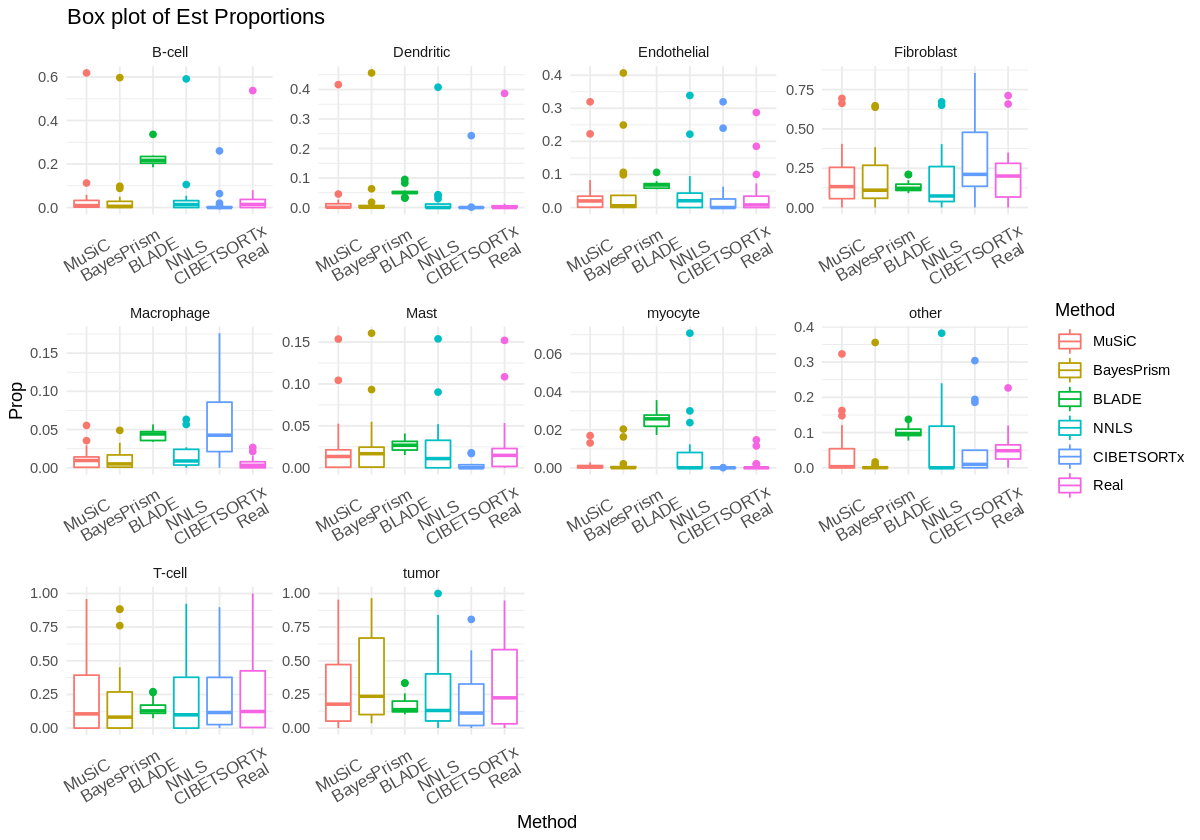

In [65]:
options(repr.plot.width=10)

Boxplot_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res),
                          data.matrix(CIBERSORTx_res),
                            data.matrix(real_res)),
                        method.name = c('MuSiC', 'BayesPrism','BLADE','NNLS', 'CIBETSORTx', 'Real' ), title = 'Box plot of Est Proportions')
#             method.name = c('MuSiC','NNLS', 'Real' ), title = 'Box plot of Est Proportions')

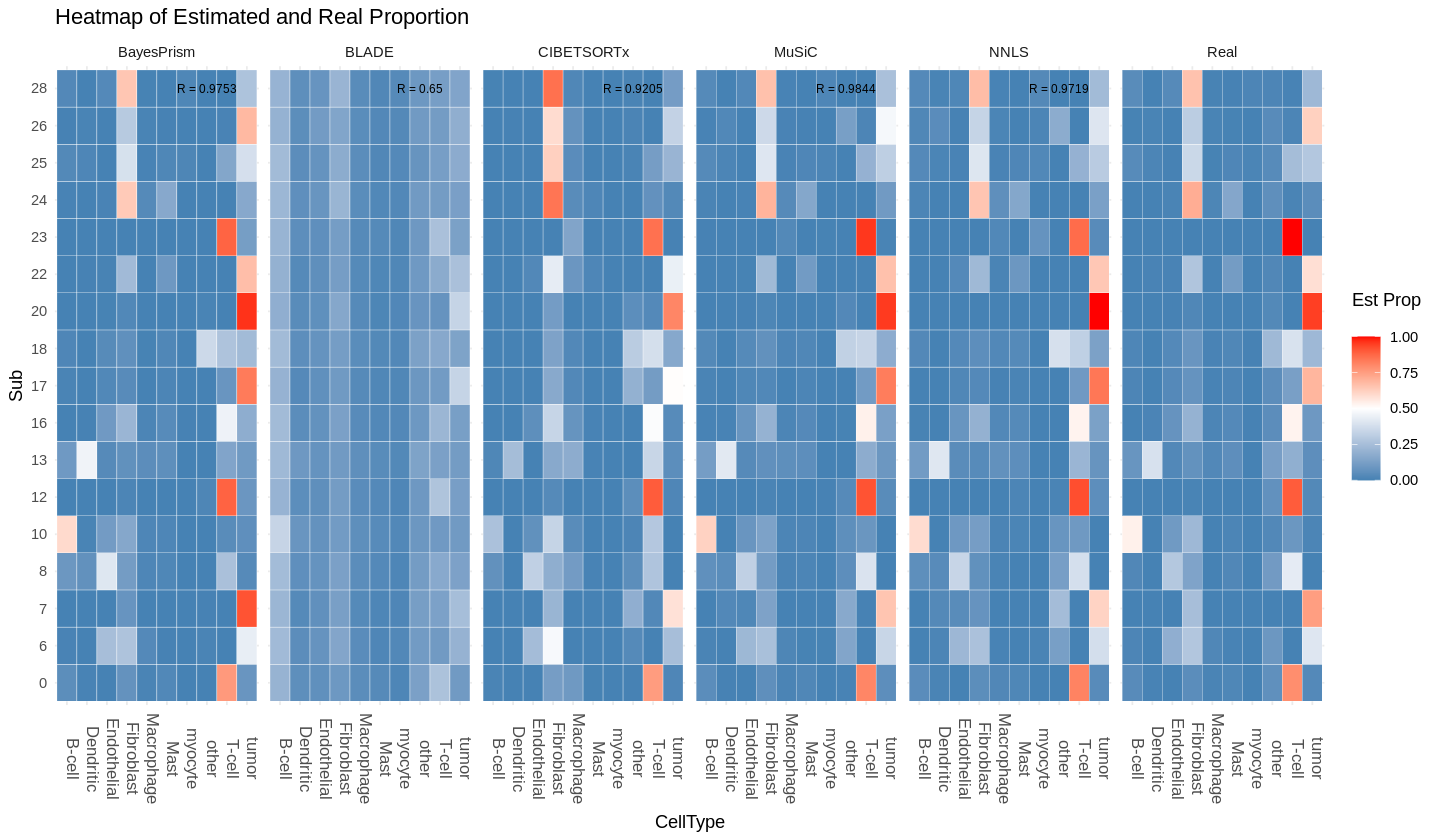

In [63]:
# Generate heatmaps of real and estimated cell type proportions side by side. Pearson correlation can be calculated and printed.
options(repr.plot.width=12)

Prop_comp_multi(data.matrix(real_res),list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res),
                          data.matrix(CIBERSORTx_res)),
                        method.name = c('MuSiC', 'BayesPrism','BLADE','NNLS', 'CIBETSORTx' ))

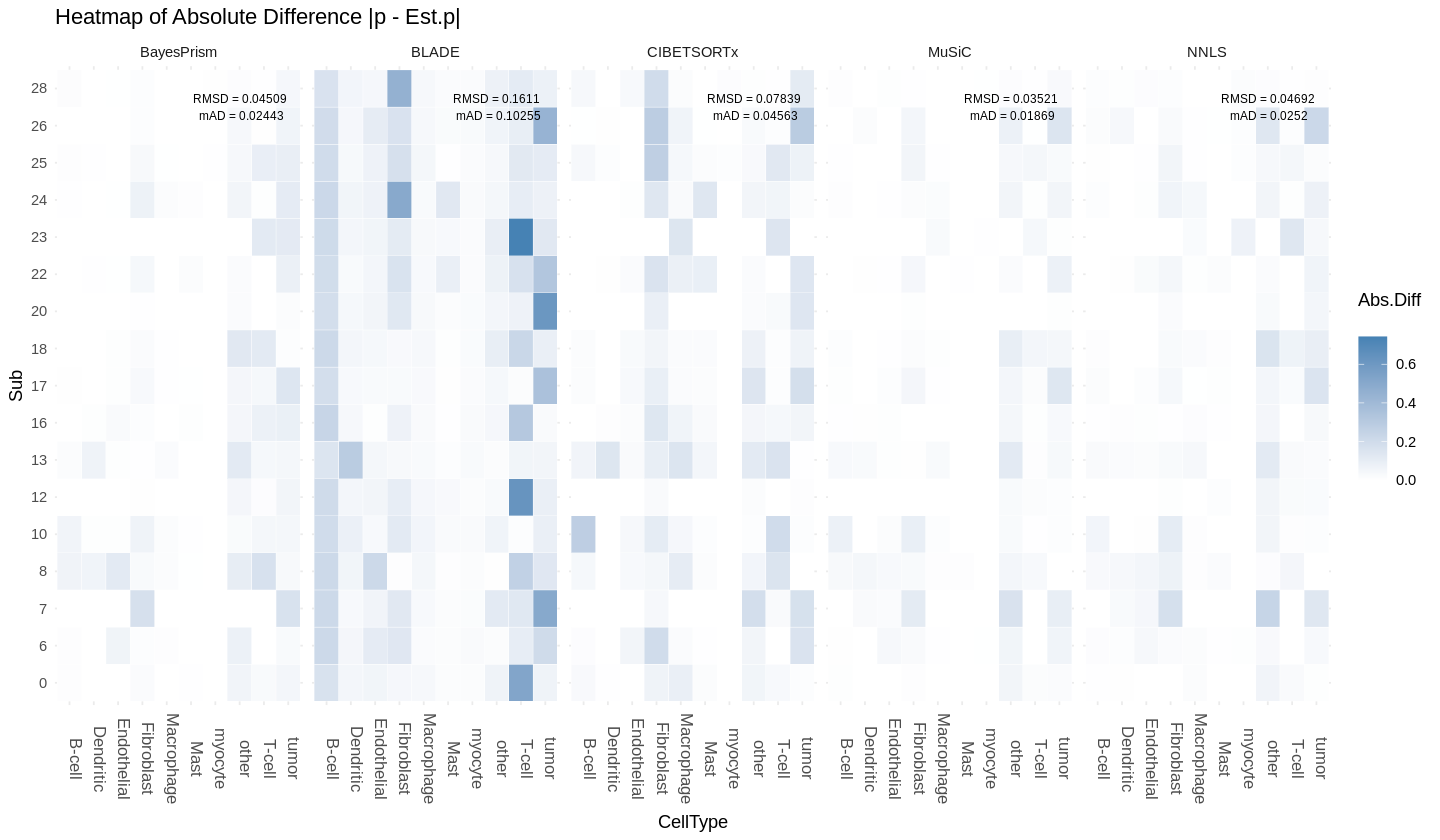

In [62]:
# Generate a series of heatmap of absolute difference between estimated and real cell type proportion with option of printing RMSD and mAD between real and estimated cell type proportions
options(repr.plot.width=12)

Abs_diff_multi(data.matrix(real_res),list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res),
                          data.matrix(CIBERSORTx_res)),
                        method.name = c('MuSiC', 'BayesPrism','BLADE','NNLS', 'CIBETSORTx' ))

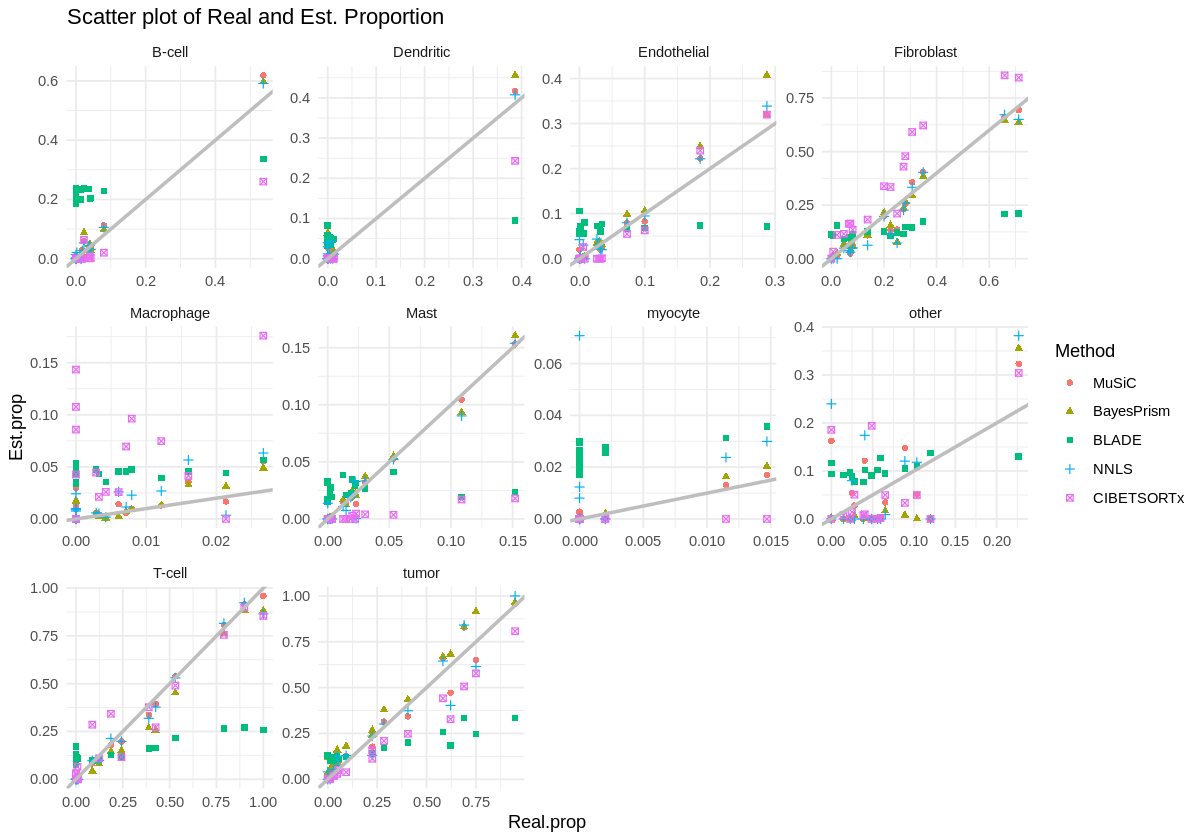

In [59]:
# Generate a series of scatter plot for each cell type between real and estimated cell type proportions
options(repr.plot.width=10)
Scatter_multi(data.matrix(real_res),list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res),
                          data.matrix(CIBERSORTx_res)),
                        method.name = c('MuSiC', 'BayesPrism','BLADE','NNLS', 'CIBETSORTx' ))

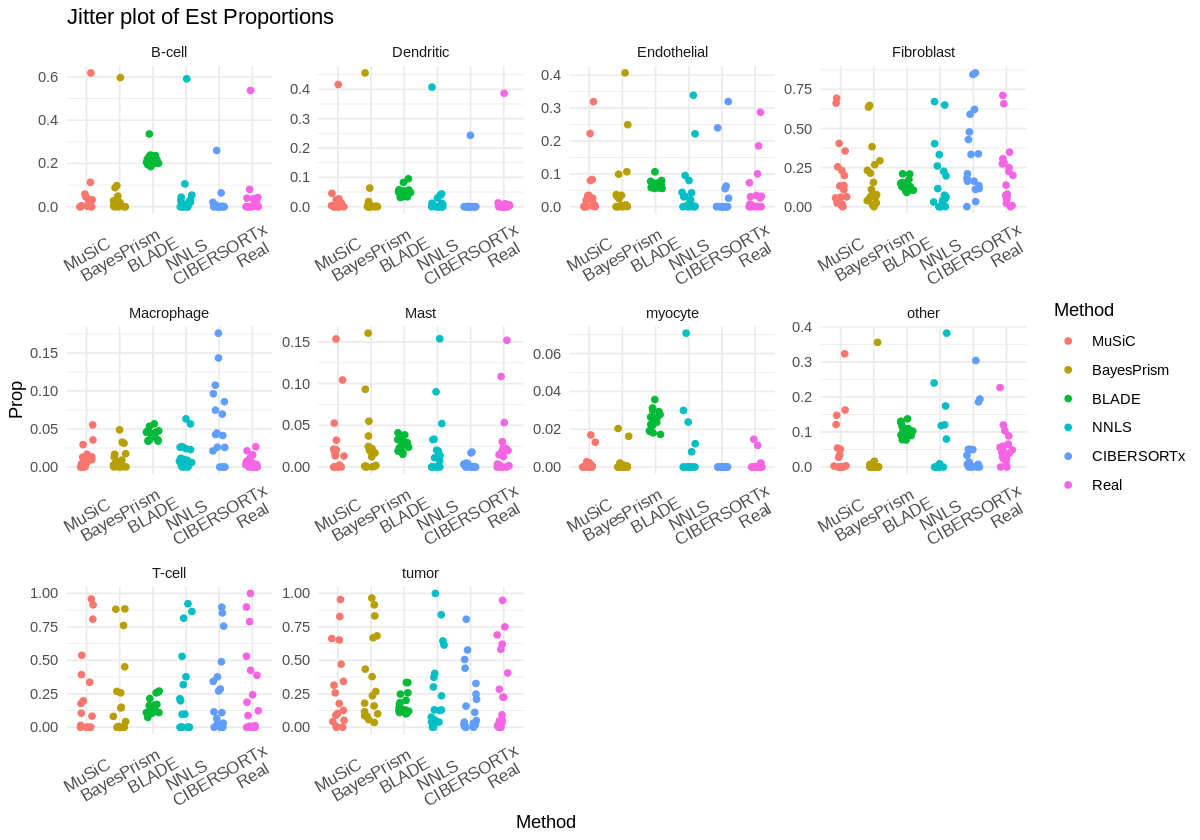

In [60]:
# Jitter plot of estimated cell type proportions
options(repr.plot.width=10)

Jitter_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res),
                         data.matrix(CIBERSORTx_res),
                            data.matrix(real_res)),
                        method.name = c('MuSiC','BayesPrism','BLADE', 'NNLS','CIBERSORTx', 'Real' ), title = 'Jitter plot of Est Proportions')

In [79]:
cor.test(as.vector(data.matrix(real_prop_raw)),as.vector(data.matrix(NNLS_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(real_prop_raw)) and as.vector(data.matrix(NNLS_res))
t = 53.554, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9621829 0.9792046
sample estimates:
      cor 
0.9719388 


In [76]:
cor.test(as.vector(data.matrix(real_prop_raw)),as.vector(data.matrix(MuSiC_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(real_prop_raw)) and as.vector(data.matrix(MuSiC_res))
t = 72.571, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9789600 0.9884746
sample estimates:
      cor 
0.9844221 


In [77]:
cor.test(as.vector(data.matrix(real_prop_raw)),as.vector(data.matrix(BP_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(real_prop_raw)) and as.vector(data.matrix(BP_res))
t = 57.199, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9666573 0.9816838
sample estimates:
      cor 
0.9752735 


In [78]:
cor.test(as.vector(data.matrix(real_prop_raw)),as.vector(data.matrix(BLADE_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(real_prop_raw)) and as.vector(data.matrix(BLADE_res))
t = 11.085, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5535952 0.7291376
sample estimates:
      cor 
0.6499528 


In [56]:
cor.test(as.vector(data.matrix(real_prop_raw)),as.vector(data.matrix(CIBERSORTx_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(real_prop_raw)) and as.vector(data.matrix(CIBERSORTx_res))
t = 30.536, df = 168, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8938335 0.9406897
sample estimates:
      cor 
0.9205076 


In [57]:
# save all curated cell type prop results into csv format
write.csv(MuSiC_res, "/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_pseudobulk.csv")
write.csv(BP_res, "/home/cke/BayesPrism/celltypefrac_BP_Puramfiltered_pseudobulk.csv")
write.csv(BLADE_res, "/home/cke/BLADE/data/celltypefrac_BLADE_Puramfiltered_pseudobulk.csv")
write.csv(NNLS_res,"/home/cke/MuSic/celltypefrac_NNLS_Puramfiltered_pseudobulk.csv")
write.csv(real_res,"/home/cke/MuSic/celltypefrac_real_pseudobulk.csv")
write.csv(CIBERSORTx_res,"/home/cke/CIBERSORTx/celltypefrac_CIBERSORTx_Puramfiltered_pseudobulk.csv")

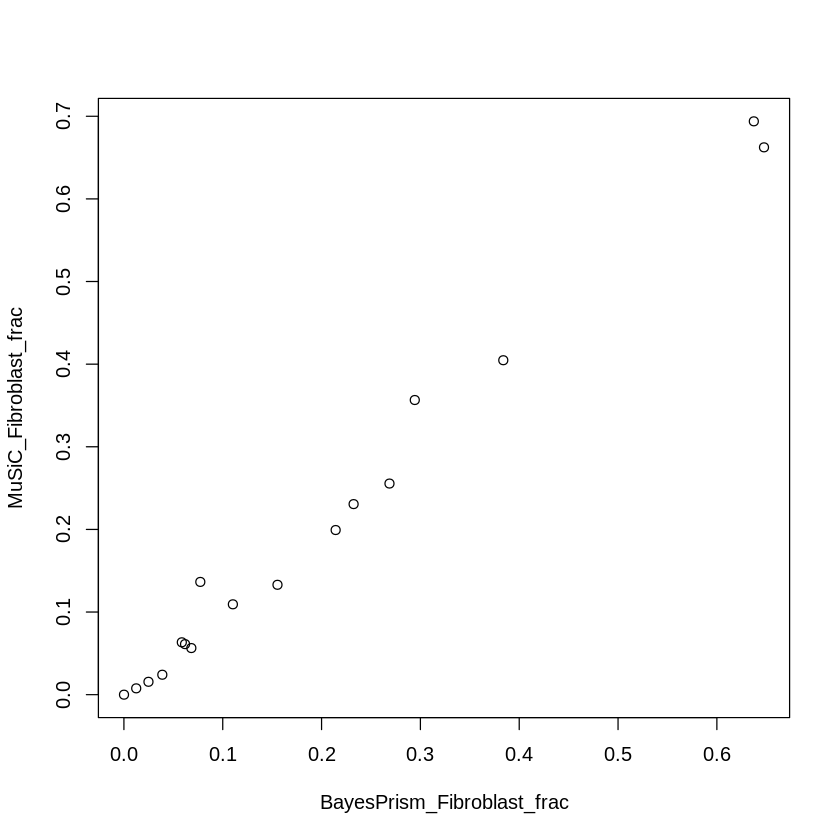

In [82]:
# fibroblast cell type fraction correlations
BayesPrism_Fibroblast_frac <- BP_res$Fibroblast
MuSiC_Fibroblast_frac <- data.frame(MuSiC_res)$Fibroblast
plot(BayesPrism_Fibroblast_frac,MuSiC_Fibroblast_frac)
# cor.test(res1$res$final.gibbs.thet$Fibroblast, Est.prop.tcga['Est.prop.weighted']$Fibroblast)

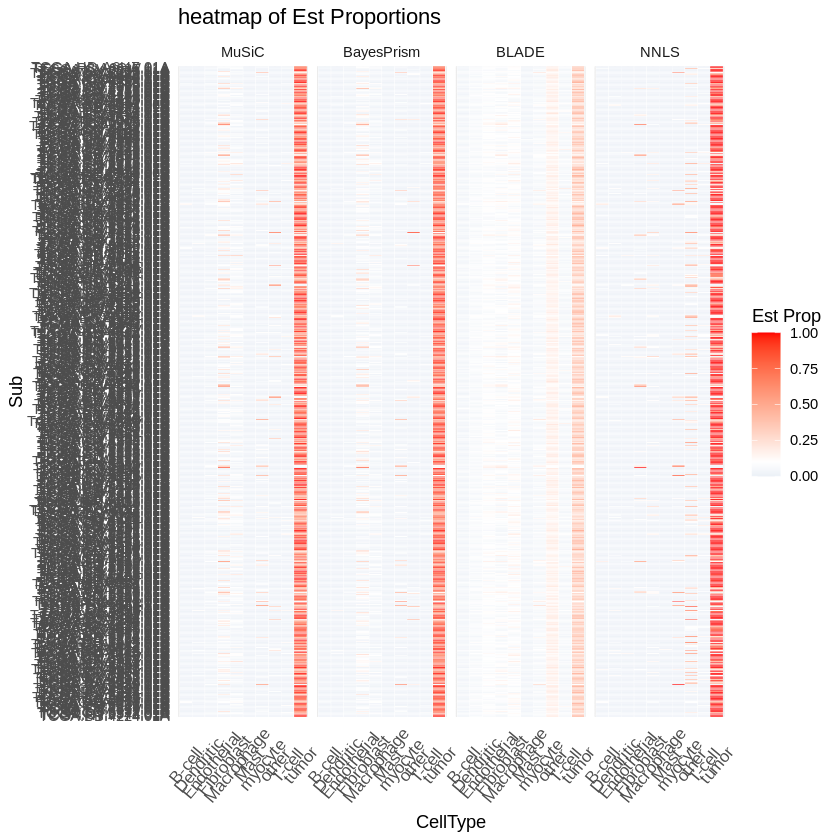

In [43]:
Prop_heat_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
              
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'heatmap of Est Proportions')

In [58]:
library(Metrics)
# GET Root Mean Square Error for each methods 
# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows 
# that the model can relatively predict the data accurately.
rmse(data.matrix(MuSiC_res),data.matrix(real_res))

[1] 0.03521045

In [59]:
rmse(data.matrix(BP_res),data.matrix(real_res))

[1] 0.04508973

In [60]:
rmse(data.matrix(BLADE_res),data.matrix(real_res))

[1] 0.1611044

In [61]:
rmse(data.matrix(NNLS_res),data.matrix(real_res))

[1] 0.04692463

In [62]:
rmse(data.matrix(CIBERSORTx_res),data.matrix(real_res))

[1] 0.07839399

In [88]:
# pearson correlation between cell types from different methods
cor_music_real <- cor(data.matrix(MuSiC_res),data.matrix(real_res))
summary(cor_music_real)

     B-cell           Dendritic         Endothelial         Fibroblast      
 Min.   :-0.29847   Min.   :-0.17421   Min.   :-0.28831   Min.   :-0.56006  
 1st Qu.:-0.07874   1st Qu.:-0.14441   1st Qu.:-0.10276   1st Qu.:-0.09829  
 Median :-0.04372   Median :-0.06036   Median :-0.02969   Median :-0.02337  
 Mean   : 0.05640   Mean   : 0.12484   Mean   : 0.06852   Mean   : 0.10724  
 3rd Qu.: 0.08388   3rd Qu.: 0.14665   3rd Qu.: 0.10586   3rd Qu.: 0.37174  
 Max.   : 0.99706   Max.   : 0.99117   Max.   : 0.99252   Max.   : 0.98062  
   Macrophage            Mast             myocyte             other         
 Min.   :-0.22701   Min.   :-0.25802   Min.   :-0.18479   Min.   :-0.29015  
 1st Qu.:-0.12901   1st Qu.:-0.19899   1st Qu.:-0.16143   1st Qu.:-0.17290  
 Median : 0.08081   Median :-0.07601   Median :-0.12916   Median : 0.07227  
 Mean   : 0.14095   Mean   : 0.09599   Mean   : 0.05015   Mean   : 0.08488  
 3rd Qu.: 0.30638   3rd Qu.: 0.33254   3rd Qu.:-0.05559   3rd Qu.: 0.29557  

In [89]:
# pearson correlation between cell types from different methods
cor_bp_real <- cor(data.matrix(BP_res),data.matrix(real_res))
summary(cor_bp_real)

     B-cell           Dendritic         Endothelial         Fibroblast     
 Min.   :-0.30504   Min.   :-0.20899   Min.   :-0.30292   Min.   :-0.5469  
 1st Qu.:-0.06863   1st Qu.:-0.08297   1st Qu.:-0.12067   1st Qu.:-0.1480  
 Median :-0.03504   Median :-0.06748   Median :-0.03700   Median :-0.0184  
 Mean   : 0.07020   Mean   : 0.12467   Mean   : 0.09041   Mean   : 0.1208  
 3rd Qu.: 0.10921   3rd Qu.: 0.14653   3rd Qu.: 0.20730   3rd Qu.: 0.4160  
 Max.   : 0.99282   Max.   : 0.98964   Max.   : 0.99625   Max.   : 0.9733  
   Macrophage            Mast            myocyte             other         
 Min.   :-0.23819   Min.   :-0.2522   Min.   :-0.20676   Min.   :-0.32845  
 1st Qu.:-0.12753   1st Qu.:-0.1307   1st Qu.:-0.15493   1st Qu.:-0.16685  
 Median : 0.05016   Median :-0.0641   Median :-0.09501   Median : 0.06366  
 Mean   : 0.14931   Mean   : 0.1196   Mean   : 0.06652   Mean   : 0.10565  
 3rd Qu.: 0.32814   3rd Qu.: 0.3441   3rd Qu.:-0.01791   3rd Qu.: 0.30867  
 Max.   : 0.

In [103]:
# pearson correlation between cell types from different methods
cor_blade_real <- cor(data.matrix(BLADE_res),data.matrix(real_res))
summary(cor_blade_real)

     B-cell           Dendritic         Endothelial         Fibroblast      
 Min.   :-0.29679   Min.   :-0.22376   Min.   :-0.16749   Min.   :-0.43547  
 1st Qu.:-0.18599   1st Qu.:-0.06349   1st Qu.:-0.10586   1st Qu.:-0.17985  
 Median : 0.07602   Median : 0.16447   Median : 0.09727   Median : 0.01888  
 Mean   : 0.17524   Mean   : 0.20332   Mean   : 0.07193   Mean   : 0.10007  
 3rd Qu.: 0.50162   3rd Qu.: 0.50588   3rd Qu.: 0.17457   3rd Qu.: 0.40793  
 Max.   : 0.88278   Max.   : 0.68441   Max.   : 0.42133   Max.   : 0.85274  
   Macrophage            Mast             myocyte             other           
 Min.   :-0.26819   Min.   :-0.09828   Min.   :-0.32911   Min.   :-0.2766867  
 1st Qu.: 0.05035   1st Qu.:-0.04767   1st Qu.:-0.16159   1st Qu.:-0.0004324  
 Median : 0.27039   Median : 0.03825   Median :-0.02894   Median : 0.1532278  
 Mean   : 0.20089   Mean   : 0.03683   Mean   : 0.07234   Mean   : 0.1488353  
 3rd Qu.: 0.43704   3rd Qu.: 0.08657   3rd Qu.: 0.16829   3rd Qu.:

In [104]:
# pearson correlation between cell types from different methods
cor_nnls_real <- cor(data.matrix(NNLS_res),data.matrix(real_res))
summary(cor_nnls_real)

     B-cell           Dendritic         Endothelial         Fibroblast      
 Min.   :-0.29669   Min.   :-0.18242   Min.   :-0.26803   Min.   :-0.56372  
 1st Qu.:-0.11594   1st Qu.:-0.15227   1st Qu.:-0.16744   1st Qu.:-0.07649  
 Median :-0.04260   Median :-0.03785   Median :-0.07270   Median :-0.02393  
 Mean   : 0.04337   Mean   : 0.11850   Mean   : 0.03955   Mean   : 0.07013  
 3rd Qu.: 0.03198   3rd Qu.: 0.15015   3rd Qu.: 0.12629   3rd Qu.: 0.11900  
 Max.   : 0.99607   Max.   : 0.98889   Max.   : 0.98581   Max.   : 0.96827  
   Macrophage            Mast             myocyte             other         
 Min.   :-0.22022   Min.   :-0.27366   Min.   :-0.18134   Min.   :-0.36032  
 1st Qu.:-0.14019   1st Qu.:-0.20353   1st Qu.:-0.16572   1st Qu.:-0.17643  
 Median : 0.02176   Median :-0.06986   Median :-0.13026   Median : 0.10963  
 Mean   : 0.12547   Mean   : 0.11234   Mean   :-0.01062   Mean   : 0.07372  
 3rd Qu.: 0.32468   3rd Qu.: 0.34591   3rd Qu.:-0.07020   3rd Qu.: 0.28089  

In [63]:
# pearson correlation between cell types from different methods
cor_cibersortx_real <- cor(data.matrix(CIBERSORTx_res),data.matrix(real_res))
summary(cor_cibersortx_real)

     B-cell           Dendritic         Endothelial         Fibroblast      
 Min.   :-0.27337   Min.   :-0.17147   Min.   :-0.27371   Min.   :-0.58398  
 1st Qu.:-0.12682   1st Qu.:-0.14135   1st Qu.:-0.10519   1st Qu.:-0.26311  
 Median : 0.01290   Median :-0.04009   Median :-0.04339   Median :-0.14598  
 Mean   : 0.04660   Mean   : 0.09978   Mean   : 0.06790   Mean   :-0.03252  
 3rd Qu.: 0.04721   3rd Qu.: 0.05062   3rd Qu.: 0.04501   3rd Qu.:-0.02809  
 Max.   : 0.96903   Max.   : 0.99909   Max.   : 0.97239   Max.   : 0.95987  
   Macrophage             Mast             myocyte             other         
 Min.   :-0.259731   Min.   :-0.22613   Min.   :-0.23830   Min.   :-0.27297  
 1st Qu.:-0.195298   1st Qu.:-0.16063   1st Qu.:-0.18197   1st Qu.:-0.18440  
 Median : 0.004635   Median :-0.08900   Median :-0.13119   Median : 0.01454  
 Mean   : 0.049137   Mean   : 0.08287   Mean   :-0.08108   Mean   : 0.03536  
 3rd Qu.: 0.214508   3rd Qu.: 0.21409   3rd Qu.:-0.10695   3rd Qu.: 0.2

In [91]:
png("/home/cke/PseudoBulk/Pearsoncorr_MuSiC_real.png",bg='transparent')
corrplot(cor_music_real,method = 'color',
        xlab='MuSiC',ylab='Real',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of pseudobulk cell type proportion:\n Deconvolved vs Real', line =2)
dev.off()

png 
  2

In [94]:
png("/home/cke/PseudoBulk/Pearsoncorr_BP_real.png",bg='transparent')
corrplot(cor_bp_real,method = 'color',
        xlab='BayesPrism',ylab='Real',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of pseudobulk cell type proportion:\n Deconvolved vs Real', line =2)
dev.off()

png 
  2

In [95]:
png("/home/cke/PseudoBulk/Pearsoncorr_BLADE_real.png",bg='transparent')
corrplot(cor_blade_real,method = 'color',
        xlab='BLADE',ylab='Real',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of pseudobulk cell type proportion:\n Deconvolved vs Real', line =2)
dev.off()

png 
  2

In [105]:
png("/home/cke/PseudoBulk/Pearsoncorr_NNLS_real.png",bg='transparent')
corrplot(cor_nnls_real,method = 'color',
        xlab='NNLS',ylab='Real',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of pseudobulk cell type proportion:\n Deconvolved vs Real', line =2)
dev.off()

png 
  2

In [65]:
png("/home/cke/PseudoBulk/Pearsoncorr_CIBERSORTx_real.png",bg='transparent')
corrplot(cor_cibersortx_real,method = 'color',
        xlab='CIBERSORTx',ylab='Real',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of pseudobulk cell type proportion:\n Deconvolved vs Real', line =2)
dev.off()

png 
  2

### Survival analysis, cell type proportion to survival
calculate median cell type prop for each cell type, asign two prop groups(high,low) for each cell type. Meier Kaplan log rank test analysis.

In [109]:
medMuSiC <- apply(data.matrix(Est.prop.tcga$Est.prop.weighted),2,median)
medBP <- apply(data.matrix(res1$res$final.gibbs.thet),2,median)

In [110]:
medMuSiC

Fibroblast       tumor      B cell     myocyte              Macrophage 
0.202140546 0.551693818 0.000000000 0.000000000 0.019837698 0.016804506 
Endothelial      T cell   Dendritic        Mast 
0.040984023 0.003040521 0.014968495 0.000000000

medBP